In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

<h1>Model Training and Improvement - Regression</h1>

In [3]:
mpg_data = pd.read_fwf("data/autompg/auto-mpg.data", header = None, na_vals = ["?"])

In [4]:
mpg_data.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [5]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
mpg_data.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
mpg_data = mpg_data.drop(mpg_data[mpg_data.horsepower == "?"].index)

In [8]:
mpg_data.horsepower = mpg_data.horsepower.astype(float)

In [9]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
mpg_data.shape

(392, 9)

In [11]:
mpg_data = mpg_data.drop("car name", axis = 1)

In [12]:
mpg_data_attributes = mpg_data.drop("mpg", axis = 1)
mpg_data_target = mpg_data["mpg"]

In [13]:
mpg_data_attributes_scaled = MinMaxScaler().fit_transform(mpg_data_attributes)

In [14]:
mpg_data_attributes_scaled.min(axis = 0), mpg_data_attributes_scaled.max(axis = 0)

(array([0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]))

In [15]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

LinearRegression()

In [16]:
linear_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.8214780764810597

In [17]:
l2_regression = Ridge()
l2_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

Ridge()

In [18]:
l2_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.8164896635931875

In [19]:
l1_regression = Lasso(alpha = 1)
l1_regression.fit(mpg_data_attributes_scaled, mpg_data_target)

Lasso(alpha=1)

In [20]:
l1_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.4854235870676168

In [21]:
l1_regression = Lasso(alpha = 2)
l1_regression.fit(mpg_data_attributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_attributes_scaled, mpg_data_target)

0.03763516750331597

In [22]:
l1_regression.coef_, l1_regression.intercept_

(array([-0.56252032, -0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.        ]),
 23.724021525870285)

In [23]:
mpg_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [24]:
mpg_data_attributes_scaled_train, mpg_data_attributes_scaled_test, mpg_data_target_train, mpg_data_target_test = train_test_split(mpg_data_attributes_scaled, mpg_data_target, train_size = 0.7, random_state = 42)

In [25]:
mpg_data_attributes_scaled_train.shape, mpg_data_attributes_scaled_test.shape

((274, 7), (118, 7))

In [26]:
mpg_data_target_train.shape, mpg_data_target_test.shape

((274,), (118,))

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_attributes_scaled_train, mpg_data_target_train)

LinearRegression()

In [28]:
linear_regression.score(mpg_data_attributes_scaled_train, mpg_data_target_train)

0.8221075220232332

In [29]:
linear_regression.score(mpg_data_attributes_scaled_test, mpg_data_target_test)

0.8097361276184126

In [30]:
predicted_mpgs = linear_regression.predict(mpg_data_attributes_scaled_test)

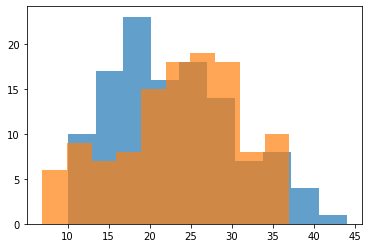

In [34]:
plt.hist(mpg_data_target_test, alpha = 0.7)
plt.hist(predicted_mpgs, alpha = 0.7)
plt.show()

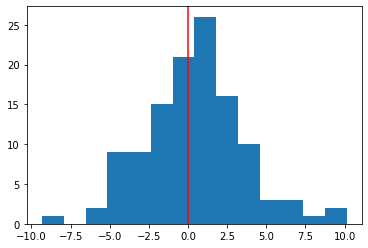

In [36]:
plt.hist(predicted_mpgs - mpg_data_target_test, bins = 'fd')
plt.axvline([0], c = 'r')
plt.show()

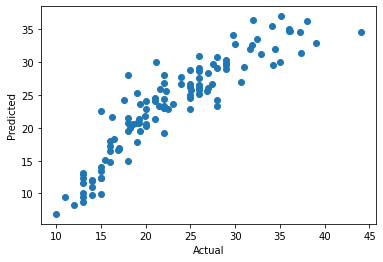

In [39]:
plt.scatter(mpg_data_target_test, predicted_mpgs)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

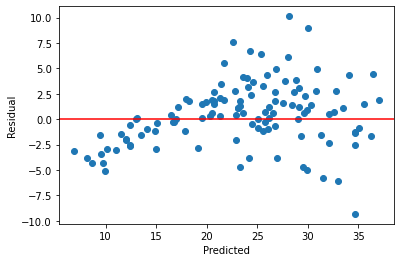

In [41]:
plt.scatter(predicted_mpgs, predicted_mpgs - mpg_data_target_test)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline([0], c = 'r')
plt.show()